### Codio Activity 12.4: Accuracy, Precision, and Recall

This activity focuses on differentiating between three classification metrics -- accuracy, precision, and recall.  Depending on the situation you may have different perspectives.  In this assignment, you will use the scikit-learn metrics to evaluate and compare performance metrics.  In the next assignment, you will use confusion matrices to visually intuit these ideas.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.datasets import load_breast_cancer
from sklearn import set_config

set_config(display="diagram")

### The Data

Your dataset for this problem will be a built in dataset from scikitlearn containing measurements determined from images of breast cancer tumors and the label of malignant or benign.  There are 30 features and the target feature.  The data is loaded and split below. 
<p>Target = 0 means the cancer is malignant, Target = 1 means the cancer is benign

In [2]:
cancer = load_breast_cancer(as_frame=True)

In [3]:
df = cancer.frame

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df['target'] = np.where(df['target'] == 0,'malignant','benign')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


Text(0.5, 1.0, 'Count of target observations')

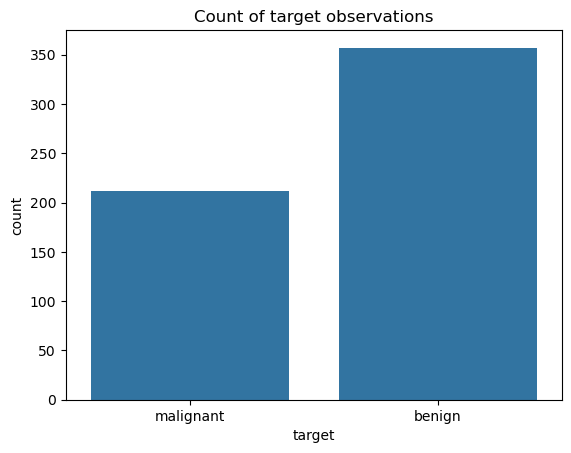

In [9]:
sns.countplot(data = df, x = 'target')
plt.title('Count of target observations')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 1), df.target, 
                                                    random_state = 42,
                                                   stratify = df.target)

### Problem 1

#### Setting a Baseline

It is always important to get in the habit of checking the baseline score for a classification model.  Here, when splitting the data the `stratify` argument was used so that both the train and test set would have a similar proportion of classes.  This can be seen below.  Using this data, what is a baseline score for the model that predicts the majority class for all data points?  Enter your answer as a string to `baseline` below.

```
a) 37% accuracy
b) 63% accuracy
c) 50% accuracy
d) 100% accuracy
```

In [13]:
y_test.value_counts(normalize = True)

target
benign       0.629371
malignant    0.370629
Name: proportion, dtype: float64

In [14]:
y_train.value_counts(normalize = True)

target
benign       0.626761
malignant    0.373239
Name: proportion, dtype: float64

In [15]:
baseline = 'b'

### Problem 2

#### Pipeline for scaling and KNN

To begin, create a pipeline `knn_pipe` with named steps `scale` and `knn` that uses the `StandardScaler` followed by the `KNeighborsClassifier` with `n_neighbors = 10`. Use the `fit` function on `knn_pipe` to train the pipeline on `X_train` and `y_train`.

In [16]:
knn_pipe = Pipeline([('scale',StandardScaler()),
                     ('knn', KNeighborsClassifier(n_neighbors = 10))])
knn_pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [17]:
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

### Problem 3

#### Evaluating your classifier

Three scoring methods have been imported from scikit-learn that are used by comparing predictions to actual values.  Choose which method from `precision_score`, `recall_score`, and `accuracy_score` indicate fewer false positives (where a higher score means FEWER false positives). 

To achieve this, use the `precision_score` function with arguments `y_test` and `knn_pipe.predict(X_test)` and with `pos_label`  equal to `'malignant'`. Assign yoour result to `min_fp`.


In [18]:
min_fp = precision_score(y_test, knn_pipe.predict(X_test), pos_label = 'malignant')
min_fp

0.9795918367346939

### Problem 4

#### Right kind of mistakes

In this situation, which mistake is more detrimental to the patient if we attempt to use our algorithm to classify tumors as malignant or benign.  Would you rather avoid false positives or false negatives?  What metric does this mean we should use here? Enter your answer as a string to `best_metric` below -- `precision`, `recall`, or `accuracy`?

In [19]:
best_metric = 'recall'

In [20]:
'False negatives would perhaps be the worst here.'

'False negatives would perhaps be the worst here.'

### Problem 5

#### Improving a model based on specific metric

Before, when using the `GridSearchCV` the best model has been selected using the default scoring method of the estimator.  You can change this behavior by passing an appropriate metric to the `scoring` argument. 

- Use the `map` function on `y_train` with arugument equal to `target_map`. Assign your result to `y_train_numeric`.
- Use the `map` function on `y_test` with arugument equal to `target_map`. Assign your result to `y_test_numeric`.
- Use the `GridSearchCV` function to implement a grid search on `knn_pipe` for odd numbers of neighbors from 1 to 21 where `recall` is the scoring metric used. Assign the resul to `recall_grid`.
- Use the `fit` function on `recall_grid` to train your model using `X_train` and `y_train_numeric`.
- Use the `score` function on `recall_grid` to calculate the best model using `X_test` and  `y_test_numeric`. Assing your result to `best_score`.

In [21]:
target_map = {'malignant': 1, 'benign': 0}

In [22]:
y_train_numeric = y_train.map(target_map)
y_test_numeric = y_test.map(target_map)

In [27]:
recall_grid = GridSearchCV(knn_pipe, param_grid = {'knn__n_neighbors': range(1,23,2)}, scoring = 'recall')
recall_grid

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=10))]),
             param_grid={'knn__n_neighbors': range(1, 23, 2)},
             scoring='recall')

In [28]:
recall_grid.fit(X_train,y_train_numeric)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=10))]),
             param_grid={'knn__n_neighbors': range(1, 23, 2)},
             scoring='recall')

In [29]:
best_score = recall_grid.score(X_test, y_test_numeric)
best_score

0.8867924528301887

In [30]:
print(f'The best recall score is: {best_score: .2f}')

The best recall score is:  0.89


### Problem 6

#### Verifying the score
Use your `recall_grid` to make predictions on the test data and assign to preds.  Use these predictions to count the number of false negatives and true positives.  Assign these as integers to `fn` and `tp` respectively below.  This should show that the grid search scoring method has been changed to recall.  

In [31]:
recall_preds = recall_grid.predict(X_test)
fn = 0
tp = 0

In [32]:
for i,j in zip(recall_preds, y_test_numeric):
    if i == 0 and j == 1:
        fn += 1
    if i == 1 and j == 1:
        tp += 1
print(f'Recall by hand is: {tp/(tp + fn): .2f}')

Recall by hand is:  0.89


In other situations, a different metric may make sense.  Here, a specific kind of error -- labeling a cancerous tumor as not so -- is something we certainly want to avoid.  In the next activity, you will continue to consider these issues using confusion matrices to unpack the errors and how changing parameters of the estimator effects this.

### Codio Activity 12.5: Confusion Matrices and Metrics for Classification

This activity focuses on using confusion matrices to compute different classification metrics.  You will use scikitlearn to generate the confusion matrices and answer questions about the appropriate metric for the given dataset.  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn import set_config


warnings.simplefilter(action='ignore', category=FutureWarning)
set_config("display")

### The Data

For this exercise you will explore two different scenarios.  The first, is a built in dataset from scikitlearn related to breast cancer tumors.  The second is a dataset representing telecommunications customer data and retention.  

**Cancer Description**

```
This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.
```



**Telecommnunications Churn Data**

```
This data set contains information on a communcations company customers.  The target feature is whether or not the customer abandoned their subscription or were "churned".  The features primarily represent information about the customers useage.
```

 

In [5]:
cancer = load_breast_cancer(as_frame=True)
cancer_df = cancer.frame

In [6]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
churn = pd.read_csv('codio_12_5_solution/data/cell_phone_churn.csv').select_dtypes(['float', 'int', 'bool'])
churn.head()

,account_length,area_code,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account_length  3333 non-null   int64  
 1   area_code       3333 non-null   int64  
 2   vmail_message   3333 non-null   int64  
 3   day_mins        3333 non-null   float64
 4   day_calls       3333 non-null   int64  
 5   day_charge      3333 non-null   float64
 6   eve_mins        3333 non-null   float64
 7   eve_calls       3333 non-null   int64  
 8   eve_charge      3333 non-null   float64
 9   night_mins      3333 non-null   float64
 10  night_calls     3333 non-null   int64  
 11  night_charge    3333 non-null   float64
 12  intl_mins       3333 non-null   float64
 13  intl_calls      3333 non-null   int64  
 14  intl_charge     3333 non-null   float64
 15  custserv_calls  3333 non-null   int64  
 16  churn           3333 non-null   bool   
dtypes: bool(1), float64(8), int64(8)


In [7]:
churn_x, churn_y = churn.drop('churn', axis = 1), churn.churn
churn_x_train, churn_x_test, churn_y_train, churn_y_test = train_test_split(churn_x, churn_y, random_state = 42)

In [8]:
cancer_x, cancer_y = cancer.data, cancer.target
cancer_x_train, cancer_x_test, cancer_y_train, cancer_y_test = train_test_split(cancer_x, cancer_y, random_state=42)

### Problem 1

#### Pipeline for cancer data

As before, you want to scale your data prior to building the model.  Because the cancer dataset contains only numeric features, you can simply pass all features through the `StandardScaler`.  Below, construct a pipeline named `cancer_pipeline` with named steps `scale` and `knn`.  Leave all the settings to default in the `KNeighborsClassifier`. 

Fit the pipeline on the training data, and make predictions on the test data.  Assign these as an array to `cancer_preds` below. 

In [9]:
cancer_pipeline = Pipeline([('scale',StandardScaler()),
                            ('knn',KNeighborsClassifier())])
cancer_pipeline

Pipeline(steps=[('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

In [10]:
cancer_pipeline.fit(cancer_x_train,cancer_y_train)

Pipeline(steps=[('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

In [11]:
cancer_preds = cancer_pipeline.predict(cancer_x_test)
cancer_preds

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

### Problem 2

#### Confusion matrix for cancer data

Use the `ConfusionMatrixDisplay.from_predictions` function to visualize your confusion matrix on the test data.  Note that in the example of the cancer data a 1 means benign and 0 means malignant.  Use these by setting `display_labels = ['benign', 'malignant']`.  Assign your confusion matrix object to `cancer_confusion_mat` below as a ConfusionMatrixDisplay object.

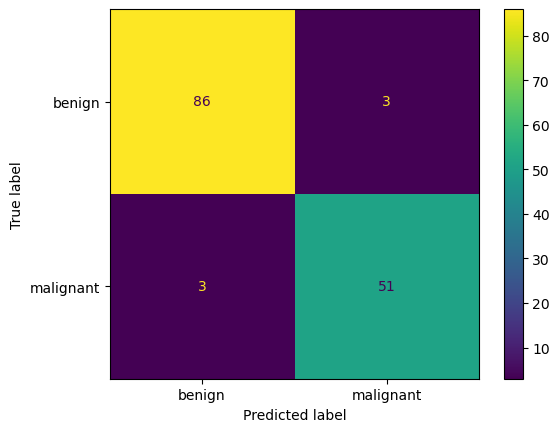

In [12]:
cancer_confusion_mat = confusion_matrix(cancer_y_test, cancer_preds, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cancer_confusion_mat, display_labels=['benign', 'malignant' ])
disp.plot()
plt.show()


In [14]:
cancer_confusion_mat

array([[86,  3],
       [ 3, 51]])

In [16]:
import seaborn as sns

In [44]:
group_names = ["True Pos", "False Neg", "False Pos", "True Neg"]
group_num = [i for i in cancer_confusion_mat.flatten()]
labels = [f"{label}\n{number}" for label, number in zip(group_names, group_num)]
labels
#sns.heatmap(cancer_confusion_mat, annot=True)

['True Pos\n86', 'False Neg\n3', 'False Pos\n3', 'True Neg\n51']

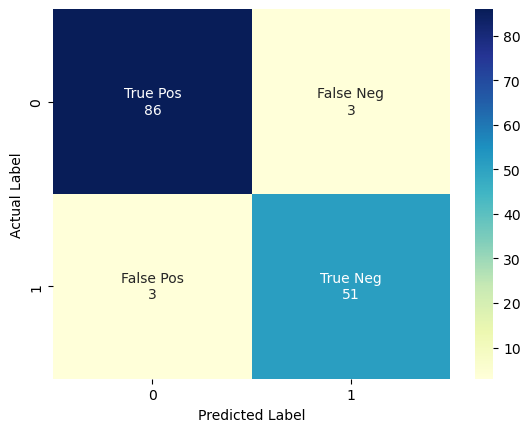

In [66]:
labels = np.array(labels).reshape(2,2)
ax = sns.heatmap(cancer_confusion_mat,cmap="YlGnBu", annot=labels, fmt="")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")
#ax.set_xticklabels([1,0])
#ax.set_yticklabels([1,0])
plt.show()

In [50]:
print(accuracy_score(cancer_y_test, cancer_preds))
print("TP+TN/all", (86+51)/ (86+51+3+3))

0.958041958041958
TP+TN/all 0.958041958041958


In [51]:
print(precision_score(cancer_y_test, cancer_preds))
print("TP/TP+FP", (86)/ (86+3))

0.9662921348314607
TP/TP+FP 0.9662921348314607


In [53]:
print(recall_score(cancer_y_test, cancer_preds))
print("TP/TP+FN", 86/(86+3))

0.9662921348314607
TP/TP+FN 0.9662921348314607


In [55]:
print("specificity_score TN/TN+FP", 51/(51+3))

specificity_score TN/TN+FP 0.9444444444444444


In [59]:
from sklearn.metrics import classification_report
print(classification_report(cancer_y_test, cancer_preds))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



### Problem 3

#### Which Errors are worse?

In this problem, which of the errors would you care more about avoiding?  Those tumors that are identified as malignant but are benign, or those that are benign classified as malignant.  Consider this from the doctors point of view.  Assign your answer as the string `false positive` (classified malignant but benign) or `false negative` (classified as benign but malignant) to `ans3` below.

In [61]:
ans3 = 'false negative'

### Problem 4

#### Adjusting the Decision Boundary

Consider improving the recall score.  By adjusting your decision boundary you can alter the recall.  Below, a new model is fit with `n_neighbors = 10` and predictions with both lower and higher decision boundaries.  Use these to decide which was better in the case of avoiding misclassifying tumors that are malignant as benign.  Select the choice 'a', 'b', or 'c' based on the confusion matrices below and assign to `best_knn` below.

In [63]:
knn_ex = Pipeline([('scaler',StandardScaler()),
                   ('knn',KNeighborsClassifier(n_neighbors = 10))])
knn_ex

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [64]:
knn_ex.fit(cancer_x_train, cancer_y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [65]:
low_preds = np.where(knn_ex.predict_proba(cancer_x_test)[:, 1] > .25, 1, 0)
high_preds = np.where(knn_ex.predict_proba(cancer_x_test)[:, 1] > .95, 1, 0)
mid_preds = knn_ex.predict(cancer_x_test)

In [67]:
low_recall = recall_score(cancer_y_test, low_preds)
low_recall

1.0

In [69]:
high_recall = recall_score(cancer_y_test, high_preds)
high_recall

0.7528089887640449

In [70]:
mid_recall = recall_score(cancer_y_test,mid_preds)
mid_recall

0.9662921348314607

In [71]:
best_knn = 'c'

### Problem 5

#### Cell Phone Churn 

In the example of the cell phone churn data, consider the problem of investing in customer incentives.  Here, you'd prefer to target customers who will likely churn.  

To begin, use the given training data -- `churn_x_train`, `churn_y_train` -- to build a pipeline named `churn_pipe` with named steps `scale` and `knn` that use `StandardScaler` and `KNeighborsClassifier` with `n_neighbors = 10` to scale and estimate the data.  Visualize your predictions using the `DisplayConfusionMatrix.from_preds` function and assign as `churn_confusion_mat`. 

In [73]:
churn_pipe = Pipeline([('scale',StandardScaler()),
                       ('knn',KNeighborsClassifier(n_neighbors = 10))])
churn_pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [74]:
churn_pipe.fit(churn_x_train, churn_y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [77]:
churn_preds = churn_pipe.predict(churn_x_test)

In [76]:
y_true = ["cat", "ant", "cat", "cat"]
y_pred = ["ant", "ant", "cat", "cat"]
confusion_matrix(y_true, y_pred, labels=[ "cat","ant"])

array([[2, 1],
       [0, 1]])

In [ ]:
cancer_confusion_mat = confusion_matrix(cancer_y_test, cancer_preds, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cancer_confusion_mat, display_labels=['benign', 'malignant' ])
disp.plot()
plt.show()


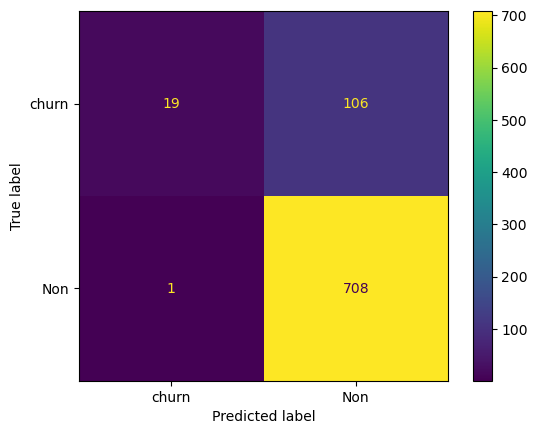

In [79]:
churn_confusion_mat = confusion_matrix(churn_y_test, churn_preds, labels = [1,0])
disp = ConfusionMatrixDisplay(confusion_matrix = churn_confusion_mat, display_labels = ['churn','Non'])
disp.plot()
plt.show()

### Problem 6

#### Adjusting the Decision Boundary

Below, create predictions for the positive class that has thresholds of greater than 30% and 80%.  Compare these to your baseline predictions at 50% and identify which one minimizes the number of churns predicted as not churning.  Assign your answer as an integer to `ans6` below -- 30, 50, or 80.

In [80]:
ans6 = 30

While remembering the different metrics of precision, recall, and accuracy are important -- in part they depend on what is considered positive or negative.  Using your confusion matrices can help intuit which metric is best for a specific scenario.   

### Codio Activity 12.6: Evaluation Curves: Precision vs. Recall and ROC

This assignment focuses on using the precision recall curves and receiver operating characteristic (ROC) curves to examine tradeoffs in classifier performance.  Also, these curves and the area determined by them can be viewed as a metric itself.  Scikit-learn implements all of this, and by the end of this activity you should be comfortable with these functions.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve
from sklearn.datasets import load_breast_cancer
from sklearn.compose import make_column_transformer
from sklearn import set_config

set_config(display="diagram")

### The Data

For this exercise, you will again use the credit card default data.  It is loaded and split below.  A pipeline for model building is also instantiated and fit. 

In [6]:
default = pd.read_csv('codio_12_6_solution/data/default.csv', index_col=0)

In [7]:
default.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [8]:
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'),['student']),
                                     remainder = StandardScaler())

In [9]:
X_train,X_test,y_train,y_test = train_test_split(default.drop('default', axis = 1), default['default'],random_state = 42, stratify = default.default)
X_train.head()

,student,balance,income
6693,Yes,1322.162293,16984.198264
576,Yes,732.719381,14568.747410
9145,No,826.022722,53874.371944
4379,No,1153.802194,37552.621619
2516,No,493.635426,43524.249778


In [10]:
knn_pipe = Pipeline([('transformer',transformer),
                     ('knn',KNeighborsClassifier(n_neighbors = 10))])
knn_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['student'])])),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [11]:
knn_pipe.fit(X_train,y_train)

/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['student'])])),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [12]:
test_preds = knn_pipe.predict_proba(X_test)
test_preds

array([[1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]], shape=(2500, 2))

### Problem 1

#### Precision for different thresholds

Below, complete the function `precision_thresh` to take in a NumPy array of predicted probabilities, and return a prediction for the positive class at or above that threshold (`thresh`), and negative prediction for the ones below.  

The function should use the `precision_score` function to return the precision score between `y_test` and `preds` with `pos_label='Yes'`.

In [10]:
def precision_thresh(predict_probs, 
                  y_test, 
                  thresh):
    """Given predicted probabilities and a threshold, this function
    computes predictions for the positive class at or above the threshold
    and returns the subesequent precision score for that thresholds predictions 
    against the test data.
    
    Parameters
    ----------
    predict_probs: type 'np.ndarray'
        1D NumPy array of probabilities for positive class
    y_test: type `np.ndarray`
        1D NumPy array of test label
    thresh: type `float`
        threshold for positive classification at or above
          
    Returns a float for precision value
    """
    return None

In [13]:
def precision_thresh(predict_probs, y_test, thresh):
    
    preds = np.where(predict_probs >= thresh,'Yes','No')
    
    return precision_score(y_test,preds, pos_label='Yes')

In [14]:
print(precision_thresh(test_preds[:, 1], y_test, 0.1))
print(precision_thresh(test_preds[:, 1], y_test, 0.9))

0.18658892128279883
0.75


### Problem 2

#### Determining precision for multiple thresholds

Now, create a DataFrame called `results_df`. This DataFrame will have a column named `threshold'` with values from the `thresholds` list. The DataFrame will also have a column named `precision`. This column should contain the precision values at each threshold calculated using the `precision_thresh` function. 


In [15]:
threshold = np.arange(0, 1, 0.1)
threshold

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [16]:
results_df = pd.DataFrame({'threshold': threshold, 'precision': [precision_thresh(test_preds[:,1],y_test,i) for i in threshold] })
results_df

,threshold,precision
0,0.0,0.033200
1,0.1,0.186589
2,0.2,0.303571
3,0.3,0.500000
4,0.4,0.500000
5,0.5,0.559322
6,0.6,0.558824
7,0.7,0.736842
8,0.8,0.736842
9,0.9,0.750000


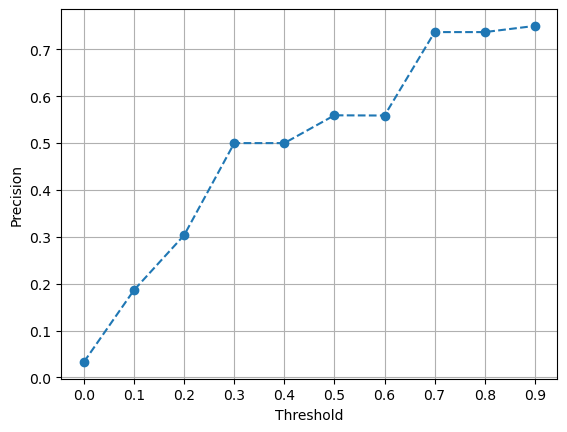

In [17]:
plt.plot(results_df['threshold'], results_df['precision'], '--o', label = 'precision')
plt.xticks(threshold)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.grid();

### Problem 3

#### A Recall threshold function

Similar to your `precision_thresh` function, complete the function `recall_thresh` below to compute the recall given a threshold.  Your function should use the `recall_score` function to return the recall score between `y_test` and `preds` with `pos_label='Yes'`.


Inside the `result_df` DataFrame, add a column called `recall`. This column should contain the recall values at each threshold calculated using the `recall_thresh` function. 

In [22]:
def recall_thresh(predict_probs, y_test, thresh):
    preds = np.where(predict_probs >= thresh,'Yes','No')
    return recall_score( y_test,preds, pos_label = 'Yes')


In [23]:
results_df['recall'] = [recall_thresh(test_preds[:, 1], y_test, i) for i in threshold]
results_df

,threshold,precision,recall
0,0.0,0.033200,1.000000
1,0.1,0.186589,0.771084
2,0.2,0.303571,0.614458
3,0.3,0.500000,0.445783
4,0.4,0.500000,0.445783
5,0.5,0.559322,0.397590
6,0.6,0.558824,0.228916
7,0.7,0.736842,0.168675
8,0.8,0.736842,0.168675
9,0.9,0.750000,0.072289


In [25]:
print(recall_thresh(test_preds[:, 1], y_test, 0.1))
print(recall_thresh(test_preds[:, 1], y_test, 0.9))


0.7710843373493976
0.07228915662650602


### Problem 4

#### Precision vs. Recall Tradeoff

**10 Points**

As you see in the plot below based on the `results_df` improving the precision involves a decrease in recall.  

<center>
    <img src = 'images/precall.png'/>
</center>

scikit learn implements a function `precision_recall_curve` that takes as arguments `y_true`, `probas_pred`, `pos_label=None`. 

The function returns the values for precision, recall, and the decision thresholds.  Use the probabilities in `test_predictions` in the `precision_recall_curve` function, and assign the results to `precision`, `recall`, and `boundaries` below.  Uncomment the plot to visualize your results.

In [27]:
precision, recall, boundaries = precision_recall_curve(y_test, test_preds[:, 1], pos_label='Yes')

In [28]:
print(boundaries[:5])

[0.  0.1 0.2 0.3 0.4]


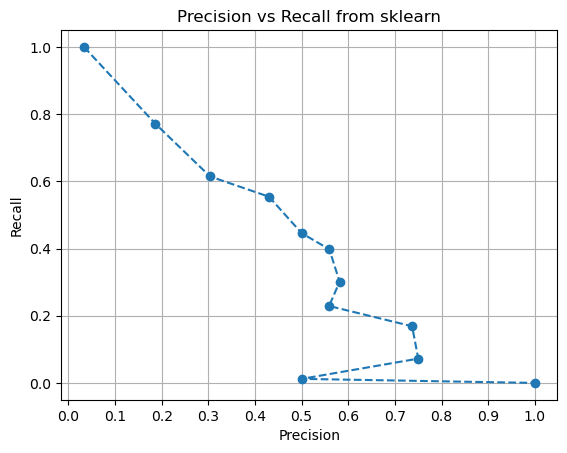

In [29]:

plt.plot(precision, recall, '--o')
plt.xticks(boundaries);
plt.grid()
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision vs Recall from sklearn');

### Problem 5

#### ROC Curve

Similar to the `precision_recall_curve` the `roc_curve` function takes in `y_true` and `y_score` which can be predicted probabilities.  The function returns the false positive rates, true positive rates, and thresholds.  Assign these to `fpr`, `tpr`, and `thresh_rocs` below.  Uncomment the code to visualize the ROC curve. 

In [30]:
fpr, tpr, thresh_rocs = roc_curve(y_test, test_preds[:, 1], pos_label='Yes')

False Positive Rates:  [0.         0.00041374 0.00082747 0.00206868 0.00620604]
True Positive Rates:  [0.         0.01204819 0.07228916 0.1686747  0.22891566]


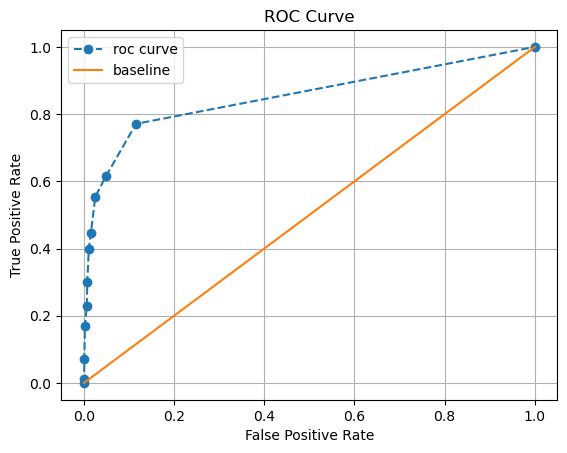

In [31]:
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid();

### Problem 6

#### Area Under Curve as metric

Finally, consider the proposed area under the curve scoring method described in the lectures.  Below, construct a grid search named `roc_grid` that uses the `knn_pipe` and searches over the number of neighbors from 1 to 31 by odd values, choosing the model that optimizes `roc_auc_score`.  Identify the optimal number of neighbors and assign to `best_k` below.  

In [32]:
roc_grid = GridSearchCV(knn_pipe, param_grid={'knn__n_neighbors': range(1, 33, 2)}, scoring = 'roc_auc')
roc_grid.fit(X_train, y_train)
best_k = roc_grid.best_params_['knn__n_neighbors']

In [33]:
best_k

29

#### Visualizing with scikitlearn

Below, we use the `RocCurveDisplay` to display roc curves for three knn models.  You can either use predictions or estimators to create the visualization.  Below, we use the `from_estimator` method.

In [34]:
from sklearn.metrics import RocCurveDisplay

In [35]:
knn_1 = Pipeline([('transform', transformer), ('knn', KNeighborsClassifier(n_neighbors = 1))])
knn_1.fit(X_train, y_train)

/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['student'])])),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

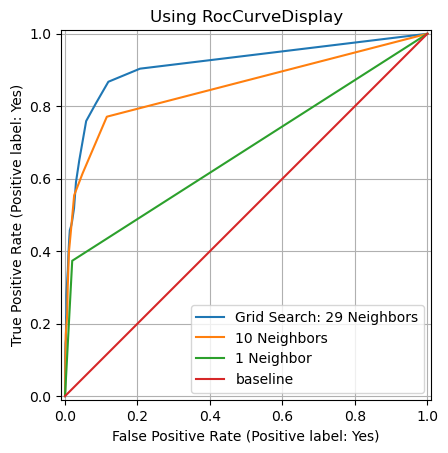

In [36]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(roc_grid, X_test, y_test, pos_label = 'Yes', ax = ax, label = 'Grid Search: 29 Neighbors')
RocCurveDisplay.from_estimator(knn_pipe, X_test, y_test, pos_label = 'Yes', ax = ax, label = '10 Neighbors')
RocCurveDisplay.from_estimator(knn_1, X_test, y_test, ax = ax, label = '1 Neighbor')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();